<h2>Presented By: Yogesh Balani</h2>

<h2>Data Science and Business Analyst Internship</h2>

<h2>Task 06: Prediction using Decision Tree Algorithm</h2>
<h3>To Do: </h3>
<ul>
  <li>Create the Decision Tree classifier and visualize it graphically.</li>
  <li>The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.</li>
</ul>

<h3>Language used: Python</h3>
<h3>Algorithm used: Decision Tree Algorithm</h3>

<h3>Dataset: <a href="https://bit.ly/3kXTdox">Iris.csv</a></h3>

<h3>importing required Libraries and Dataset</h3>

In [1]:
# using the inline backend
import numpy as np #useful for many scientific computing in Python
import pandas as pd #primary data structure library
import matplotlib.pyplot as plt #To perform graphical plot of the data
%matplotlib inline
import seaborn as sns # statistical graphics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.tree import plot_tree
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

<h3>Reading the data set.</h3>

In [2]:
df = pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
# To see what the data set looks like, we'll use the head() method.
# first 5 records from the dataset
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# last 5 records from the dataset
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
# info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
# checking for the null values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<h4>There is no null value in our dataset</h4>

In [7]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [9]:
# checking the shape og the dataset
df.shape

(150, 6)

<h3>The shape of the dataset given shows that it has 150 rows and 6 columns.</h3>

In [10]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [11]:
df.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
df.drop('Id',inplace=True,axis=1) #droping the ID column 

In [14]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<h3>Visualizing Correlation using HeatMap</h3>

<AxesSubplot:>

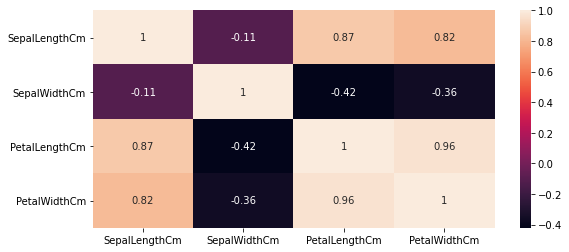

In [15]:
plt.figure(figsize=(9,4))
sns.heatmap(df.corr(), annot=True) # annot = True will print values inside the squares

In [16]:
# setting labels for species data
df['Species'] = df['Species'].map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [17]:
# checking the total number of species
df['Species'].value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

<h3>Visualisation of dataset using Scatterplot</h3>

<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

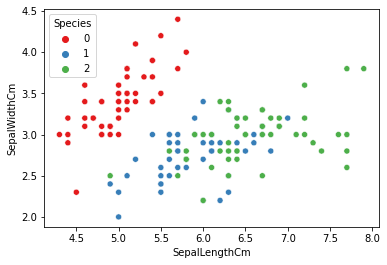

In [18]:
sns.scatterplot(x = 'SepalLengthCm', y = 'SepalWidthCm', data = df, hue='Species', palette='Set1')

<AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

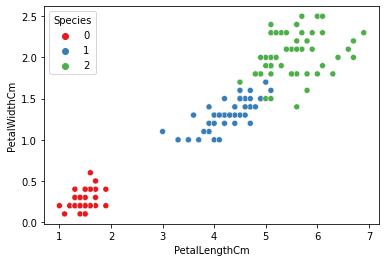

In [19]:
sns.scatterplot(x = 'PetalLengthCm', y = 'PetalWidthCm', data = df, hue = 'Species',palette='Set1')

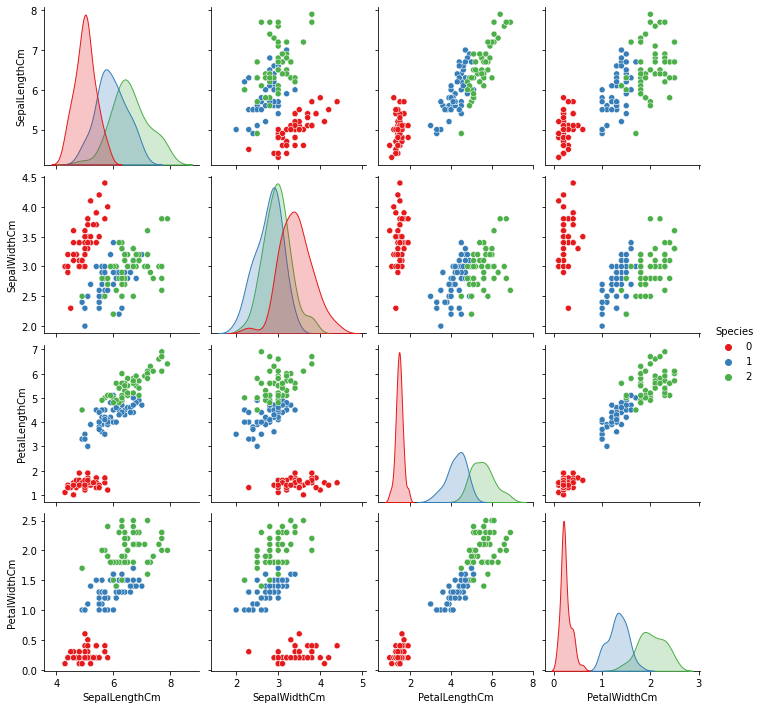

In [20]:
sns.pairplot(df, hue = 'Species', height=2.5, palette='Set1')

<h3>It can be seen from the pair-plot, Iris-Setosa forms a separate cluster, as compared to Iris-versicolor and Iris-virginica which forms closely placed clusters.</h3>

In [21]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1:]

In [22]:
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [23]:
y.head()

,Species
0,0
1,0
2,0
3,0
4,0




<h2>Model Training</h2>

   We will be using <b>train/test split</b> on our <b>decision tree</b>. Let's import <b>train_test_split</b> from <b>sklearn.cross_validation</b>.


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10) 
classifier = DecisionTreeClassifier()
classifier.fit(X_train,y_train)
print("Training Complete.")

Training Complete.


In [26]:
print(f'Shape of X training set: {X_train.shape}')
print(f'Shape of y training set: {y_train.shape}')
print(f'Shape of x test set: {X_test.shape}')
print(f'Shape of y test set: {y_test.shape}')

Shape of X training set: (105, 4)
Shape of y training set: (105, 1)
Shape of x test set: (45, 4)
Shape of y test set: (45, 1)


In [27]:
y_pred = classifier.predict(X_test)

In [28]:
# confusion matrix
confusion_matrix(y_test,y_pred)

array([[14,  0,  0],
       [ 0, 17,  0],
       [ 0,  1, 13]], dtype=int64)

In [29]:
# classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      1.00      0.97        17
           2       1.00      0.93      0.96        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [30]:
# Accuracy Score
accuracy_score(y_test,y_pred)

0.9777777777777777

<h3>Visualizing Accuracy Score using Heatmap</h3>

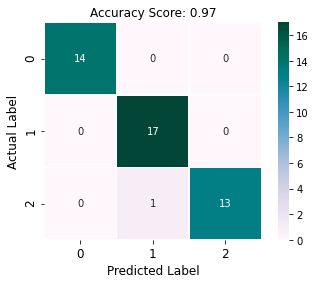

In [31]:
accuracy_score(y_test,y_pred)
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True, fmt='.0f', linewidths=0.5, square=True, cmap='PuBuGn')
plt.title('Accuracy Score: 0.97', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('Actual Label', fontsize=12)
plt.tick_params(labelsize=12)
plt.show()

<h3>We got 98% Accuracy For This Model.</h3> 

<h3>Textual Visualization of Decision Tree</h3>

In [32]:
text_representation = tree.export_text(classifier)
print(text_representation)

|--- feature_2 <= 2.45
|   |--- class: 0
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.60
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  1.60
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- class: 1
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



<h3>Visualization of Decision Tree</h3>

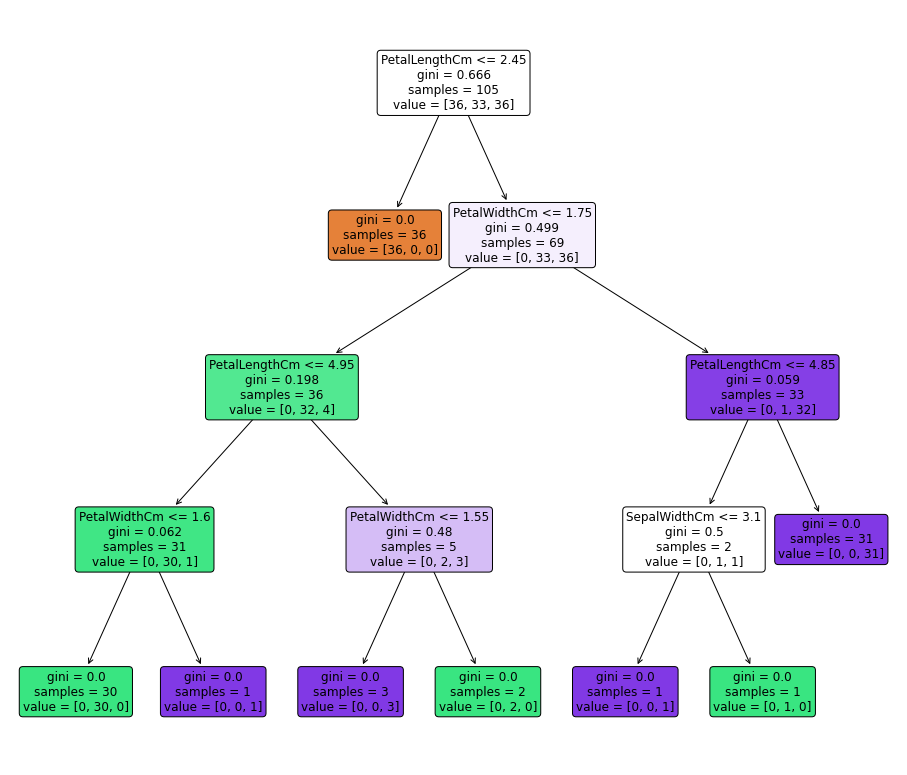

In [33]:
plt.figure(figsize=(16,14))
dtree= tree.plot_tree(classifier, feature_names = x.columns , fontsize = 12 , filled = True, rounded=True)

<h3>Predicting on Randomly Created Data</h3>

In [34]:
new_data =  pd.DataFrame({'SepalLengthCm':[3.1,2.4,4.6,1.8,5.2],
                         'SepalWidthCm':[4.3,6.1,2.4,3.3,5.1],
                         'PetalLengthCm':[2.2,3.3,4.4,3.3,2.2],
                         'PetalWidthCm':[0.8,0.7,1.4,1.6,0.9]})
new_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,3.1,4.3,2.2,0.8
1,2.4,6.1,3.3,0.7
2,4.6,2.4,4.4,1.4
3,1.8,3.3,3.3,1.6
4,5.2,5.1,2.2,0.9


In [35]:
new_pred = classifier.predict(new_data)

In [36]:
new_data['Predicted Species'] = new_pred
new_data['Predicted Species'] = new_data['Predicted Species'].map({0:'Iris-setosa', 1:'Iris-versicolor',2:'Iris-virginica'})
new_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Predicted Species
0,3.1,4.3,2.2,0.8,Iris-setosa
1,2.4,6.1,3.3,0.7,Iris-versicolor
2,4.6,2.4,4.4,1.4,Iris-versicolor
3,1.8,3.3,3.3,1.6,Iris-versicolor
4,5.2,5.1,2.2,0.9,Iris-setosa


<h4>Predicted Species Column Shows our predictions on our new randomly created data</h4>

<h4>Task Completed</h4>

<h4>Thank You!</h4>